In [29]:
import pandas as pd
import sklearn
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [30]:
df=pd.read_csv(r'D:\Machine Learning\Machine-Learning\Data\wine_data.csv',header=None,usecols=[0,1,2])
df.columns=['Class label','Alcohol','Malic Acid']
df

,Class label,Alcohol,Malic Acid
0,1,14.23,1.71
1,1,13.20,1.78
2,1,13.16,2.36
3,1,14.37,1.95
4,1,13.24,2.59
...,...,...,...
173,3,13.71,5.65
174,3,13.40,3.91
175,3,13.27,4.28
176,3,13.17,2.59


Text(0.5, 1.0, 'KDE Plot - Malic Acid')

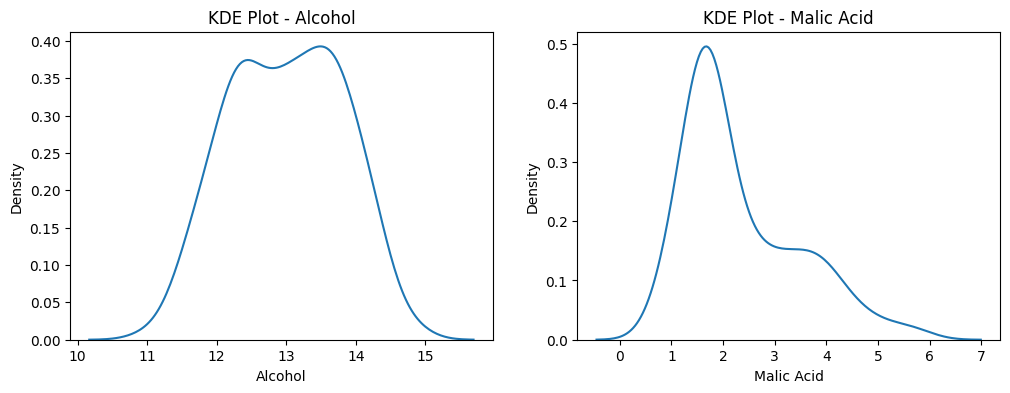

In [31]:
# Create subplots with 1 row and 2 columns
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 4))

# Plot KDE for 'Alcohol' in the first subplot
sns.kdeplot(df['Alcohol'], ax=ax1)
ax1.set_title('KDE Plot - Alcohol')

# Plot KDE for 'Malic Acid' in the second subplot
sns.kdeplot(df['Malic Acid'], ax=ax2)
ax2.set_title('KDE Plot - Malic Acid')

In [32]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(df.drop('Class label',axis=1),df['Class label'],
                                                test_size=0.3,
                                                random_state=1)


x_train.shape,x_test.shape

((124, 2), (54, 2))

## Min-Max Scaling

Min-Max Scaling, also known as Min-Max Normalization, is a data normalization technique used to scale the values of a feature within a specific range, typically between 0 and 1. The goal is to bring all the feature values to a consistent scale while preserving the relative relationships between the values.

The formula for Min-Max Scaling is:

$$ \ X_{\text{normalized}} = \frac{{X - \text{min}(X)}}{{\text{max}(X) - \text{min}(X)}} \ $$

Where:
- \( X normalized) is the normalized value of the original data point \( X \).
- \( X \) is the original value of the data point.
- \(min(X) \) is the minimum value of the feature.
- \(max(X) \) is the maximum value of the feature.

Min-Max Scaling is particularly useful when working with machine learning algorithms that are sensitive to the scale of input features. It ensures that all features contribute equally to the model, regardless of their original scales.

In [33]:
from sklearn.preprocessing import MinMaxScaler

scaler=MinMaxScaler()
scaler.fit(x_train)

x_train_scaled=scaler.transform(x_train)
x_test_scaled=scaler.transform(x_train)

In [34]:
x_train_scaled=pd.DataFrame(x_train_scaled,columns=x_train.columns)
x_test_scaled=pd.DataFrame(x_test_scaled,columns=x_test.columns)

In [36]:
np.round(x_train_scaled.describe(),1)

,Alcohol,Malic Acid
count,124.0,124.0
mean,0.5,0.3
std,0.2,0.2
min,0.0,0.0
25%,0.3,0.1
50%,0.5,0.2
75%,0.7,0.5
max,1.0,1.0


Text(0.5, 1.0, 'After Scaling')

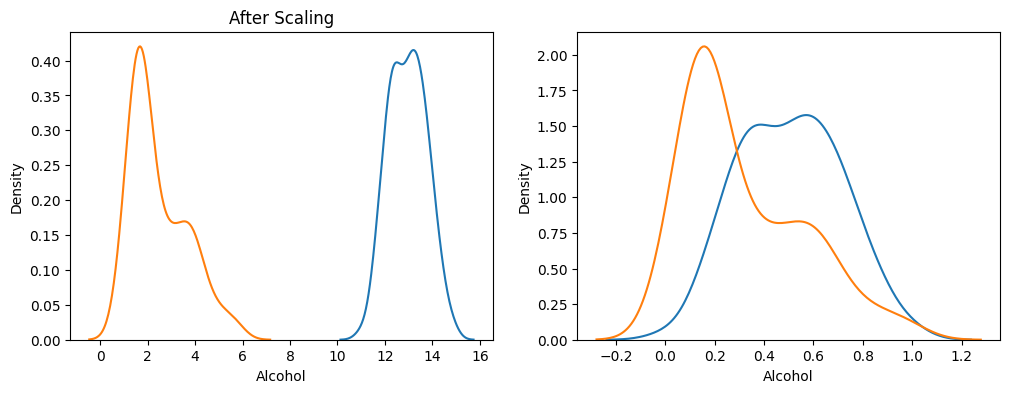

In [37]:
# Create subplots with 1 row and 2 columns
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 4))

sns.kdeplot(x_train['Alcohol'], ax=ax1)
sns.kdeplot(x_train['Malic Acid'], ax=ax1)
ax1.set_title('Before Scaling')

sns.kdeplot(x_train_scaled['Alcohol'], ax=ax2)
sns.kdeplot(x_train_scaled['Malic Acid'], ax=ax2)
ax1.set_title('After Scaling')

In [40]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Assuming x_train, y_train, x_test, y_test are your datasets

# Create a MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the training data
x_train_scaled = scaler.fit_transform(x_train)

# Transform the testing data using the same scaler
x_test_scaled = scaler.transform(x_test)

# Initialize Logistic Regression models
lr = LogisticRegression()
lr_scaled = LogisticRegression()

# Fit the models
lr.fit(x_train, y_train)
lr_scaled.fit(x_train_scaled, y_train)

# Predict using both models
y_pred = lr.predict(x_test)
y_pred_scaled = lr_scaled.predict(x_test_scaled)

# Print accuracy scores
print("Actual:", accuracy_score(y_test, y_pred))
print("Scaled:", accuracy_score(y_test, y_pred_scaled))

Actual: 0.8148148148148148
Scaled: 0.8333333333333334


## Robust Scaling

Robust Scaling is a data normalization technique used to scale the values of a feature by removing the median and scaling according to the interquartile range (IQR). This technique is particularly useful when dealing with datasets that may contain outliers, as it is less sensitive to extreme values compared to other scaling methods.

The formula for Robust Scaling is:

$$\ X_{\text{robust}} = \frac{{X - \text{median}(X)}}{{\text{IQR}(X)}} $$

Where:
- \( X_robust \) is the robustly scaled value of the original data point \( X \).
- \( X  is the original value of the data point.
- \( median(X)) is the median value of the feature.
- \( IQR(X) ) is the interquartile range of the feature.

Robust Scaling is beneficial when the dataset includes outliers that might affect the scaling process. By using the median and interquartile range, Robust Scaling provides a more robust estimate of the central tendency and spread of the data.

In Python, you can use the `RobustScaler` from scikit-learn to perform Robust Scaling:


In [41]:
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Assuming x_train, y_train, x_test, y_test are your datasets

# Create a RobustScaler
scaler = RobustScaler()

# Fit and transform the training data
x_train_scaled = scaler.fit_transform(x_train)

# Transform the testing data using the same scaler
x_test_scaled = scaler.transform(x_test)

# Initialize Logistic Regression models
lr = LogisticRegression()
lr_scaled = LogisticRegression()

# Fit the models
lr.fit(x_train, y_train)
lr_scaled.fit(x_train_scaled, y_train)

# Predict using both models
y_pred = lr.predict(x_test)
y_pred_scaled = lr_scaled.predict(x_test_scaled)

# Print accuracy scores
print("Actual:", accuracy_score(y_test, y_pred))
print("Scaled (Robust):", accuracy_score(y_test, y_pred_scaled))


Actual: 0.8148148148148148
Scaled (Robust): 0.8148148148148148
